# OpenCV Tutorial
## Philip Mathew (AI Lead)

In [36]:
import numpy as np
import matplotlib.pyplot as plt

def display_img(img, figsize=(20, 10), cmap=None):
    fig, ax = plt.subplots(1, 1, figsize=figsize)

    if cmap:
        ax.imshow(img, cmap=cmap)
    else:
        ax.imshow(img)

First things first, let's import OpenCV.

In [38]:
!pip install opencv-python
import cv2

Now, while this is not meant to be a comprehensive tutorial, it is designed to at least show off some of the capabilities of OpenCV. We'll start by grabbing some image off of the web. Simply run the following cell and we'll have the image we'll be playing with for the day.

In [3]:
!wget https://i.pinimg.com/originals/6c/69/c9/6c69c9ba322b6546648c0b805cb0d46c.png -O image.png

--2021-10-18 09:57:47--  https://i.pinimg.com/originals/6c/69/c9/6c69c9ba322b6546648c0b805cb0d46c.png
Resolving i.pinimg.com (i.pinimg.com)... 104.18.15.176, 104.18.14.176
Connecting to i.pinimg.com (i.pinimg.com)|104.18.15.176|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1917449 (1.8M) [image/png]
Saving to: ‘image.png’

image.png           100%[===================>]   1.83M  3.38MB/s    in 0.5s    

2021-10-18 09:57:48 (3.38 MB/s) - ‘image.png’ saved [1917449/1917449]



Great! Now, let's get to actually using the image. First things first, we need to load it into memory.

In [4]:
img = cv2.imread('image.png')

As we can see, we've successfully loaded in our image as a NumPy array. Now, we should probably take the image and actually see what it looks like first.

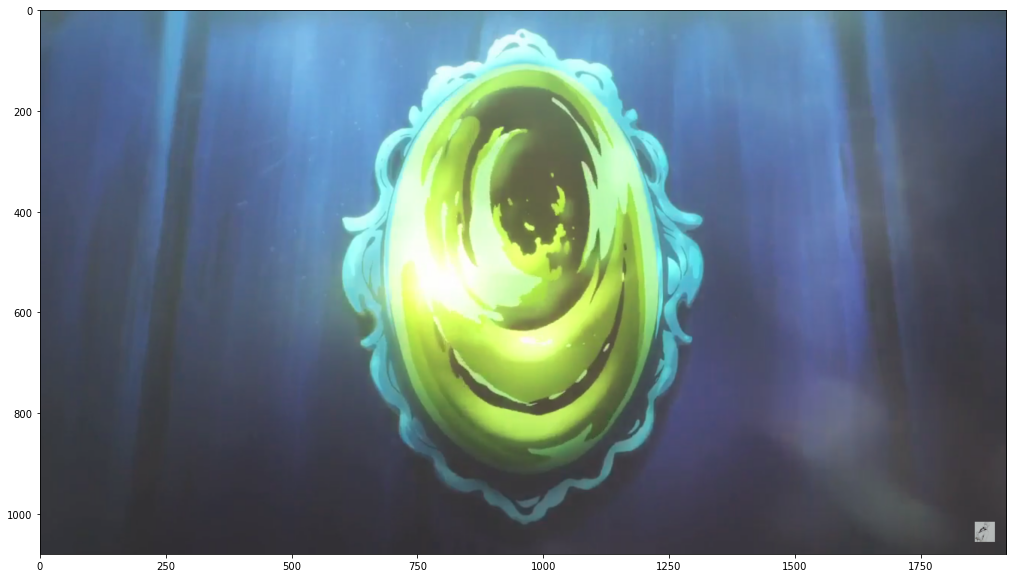

In [5]:
display_img(img)

Looks a little weird right? Well that's because OpenCV actually treats images as BGR format instead of RGB format by default (that is, the colors are treated as blue, green, red, instead of red, green, blue). Why? I have no clue, though I assume it's more optimal in some very small way. In either case, we'll need to convert it back to RGB in order to fix the weirdness.

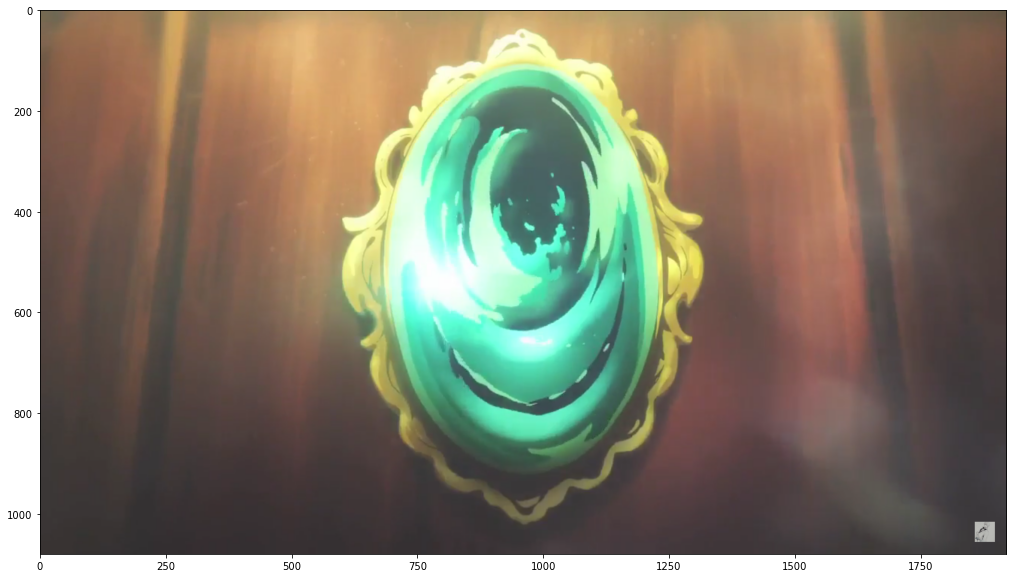

In [6]:
rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
display_img(rgb_img)

Much better! Also, if anyone knows the source of this image you're a true human of culture.

## Color-based Segmentation

On to more fun stuff! Let's try to mask out the background so that we're only left with the gemstone in the middle. As we can clearly see, the gemstone is various shade of some sort of blueish-green. It's pretty clear that defining this color will be hard with RGB values, but HSV makes it much easier, since we only need to find the minimum and maximum angles (a.k.a. min. and max. hue values) corresponding to this color and then mask out anything between them.

In [7]:
hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

Now, one can observe that the color we're looking for is between hue values of 120 and 250, so we mask out those appropriately. Note that OpenCV uses hue values in [0, 180] instead of in [0, 360] because of storage limitations, so we actually use X/2 and Y/2.

In [8]:
cmin, cmax = (120 / 2, 0, 0), (250 / 2, 255, 255)

mask = cv2.inRange(hsv_img, cmin, cmax)
res = cv2.bitwise_and(hsv_img, hsv_img, mask=mask)

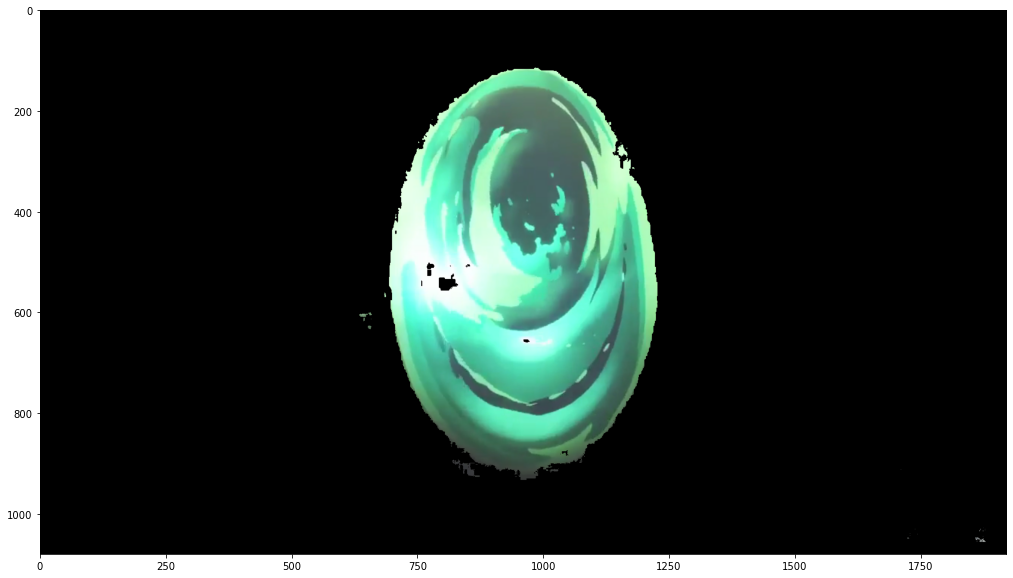

In [9]:
display_img(cv2.cvtColor(res, cv2.COLOR_HSV2RGB))

It's a bit noisy obviously, but for naively masking between a color range obtained via guess and check (on my part anyway), I'd argue it's qute a good result. It'll further inform our next section as well, so let's get to the next one then!

## Edge Detection
We'll now try to take the masked image and use it to get a boundary for the gemstone. To do so, we'll start with the masked image above, since we've already managed to extract the gemstone (mostly) from the image, and can thus more easily find the boundary.

Now, OpenCV has a variety of edge detection algorithms built in, but of them the most commonly used one is [Canny edge detection](https://en.wikipedia.org/wiki/Canny_edge_detector). In order to use this edge detection algorithm, we'll first need to blur the image, which aids in smoothing out the colors and thus removing possible noise.

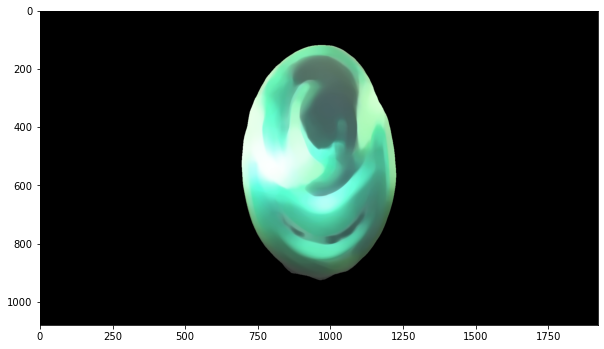

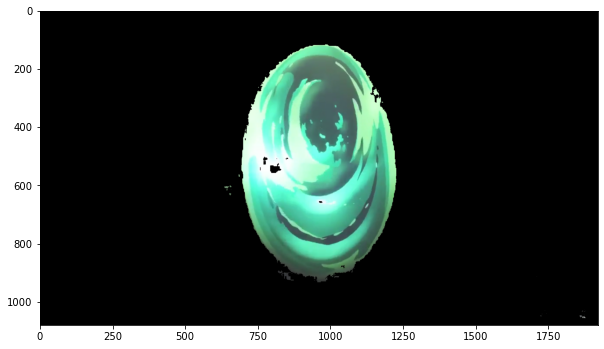

In [30]:
blur_img = cv2.cvtColor(cv2.medianBlur(res, 51), cv2.COLOR_HSV2BGR) # converting back to BGR to make life easier

display_img(cv2.cvtColor(blur_img, cv2.COLOR_BGR2RGB), figsize=(10, 8))
display_img(cv2.cvtColor(res, cv2.COLOR_HSV2RGB), figsize=(10,8))

Note that usually you don't want to apply such a high level of blur to an image, but in this case (since we're dealing with one really large object with mostly uniform color) it's fine to have this level of blurring.

Now, we apply the edge detection algorithm. Don't worry too much about the numbers we pass in, honestly those are mostly figured out through trial and error (in fact, play around with them if you so desire).

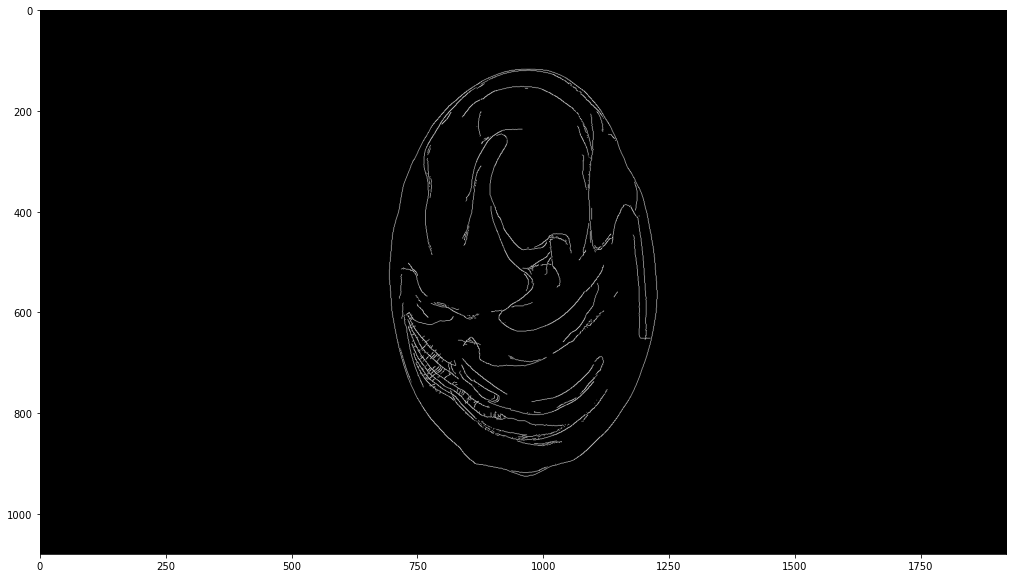

In [31]:
edges = cv2.Canny(blur_img, 0, 50)
display_img(edges, cmap='gray')

Nice right? We've officially gotten a boundary for the gemstone, but we've got a couple stray flecks along with it. We actually only want a closed curve, i.e. an unbroken boundary that separates the gemstone from the rest of the image. Now, in the language of image analysis, these closed curves are referred to as ***contours***. Our final section will detail how to go about finding these contours.

## Contour Detection

As I previously stated, we want to eliminate all the stray edges and only get back the contours from the image. As such, we can use OpenCV's ```findContours``` method for extracting these contours. 

Now, this method has a variety of parameters which aren't easily deduced. First is the ```mode``` parameter, which tells OpenCV what kinds of contours to return. You can look up all the various options; the one that's appropriate for our task is ```cv2.RETR_EXTERNAL```, which will give us the outermost contours. Next, we have the ```method`` parameter, which chooses the method of approximation for the algorithm. Honestly, I went with no approximation just for fun, but I imagine you can save some time on large tasks if you make a few approximations.

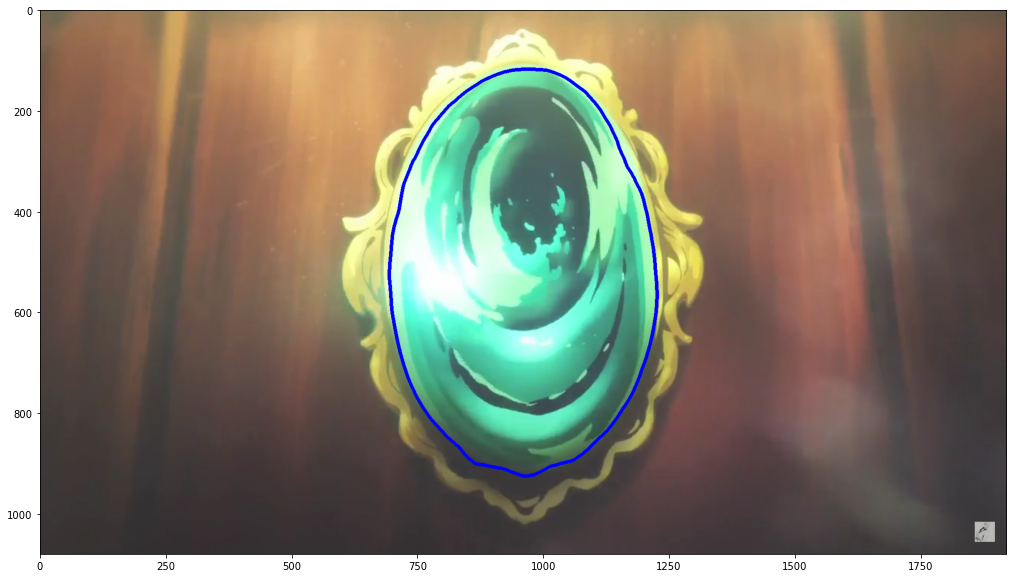

In [35]:
conts, hierarchy = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

cont_img = rgb_img.copy()
display_img(cv2.drawContours(cont_img, conts, -1, (0, 0, 255), 5))

Awesome! We can then generate a mask from here and do a whole lot more fun stuff to the image. I'll leave any further modifications as an exercise for the reader, as this is simply meant to be a small showcase instead of a comprehensive guide to OpenCV. Again, please explore OpenCV, we have barely scratched the surface of its capabilities here and it will probably be of great use to have some familiarity with the library in the near future (hint: your project will use image data!).